Hey Vincent, let's setup the environment - loading some packages in the workspace.

In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

Now, try out a lightcurve file that we just downloaded.

In [4]:
fits_file = "tess2019128220341-0000000390022444-0016-s_lc.fits"

Peek into the file

In [5]:
fits.info(fits_file)

Filename: tess2019128220341-0000000390022444-0016-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  LIGHTCURVE    1 BinTableHDU    160   20610R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (11, 11)   int32   


It's working like a charm, sort of expected but still exciting. Let's continue.
Notice that the extension 1 of the file has the light curve data.

In [6]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

Nice. The 'PDCSAP_FLUX' column has the flux data adjusted based on the camera and other conditions when the lights data were captured. Let's get that. We also shouldn't forget the 'TIME' column.

In [7]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

Now, the moment of truth. Time to plot the light curve. Vincent, shall we?

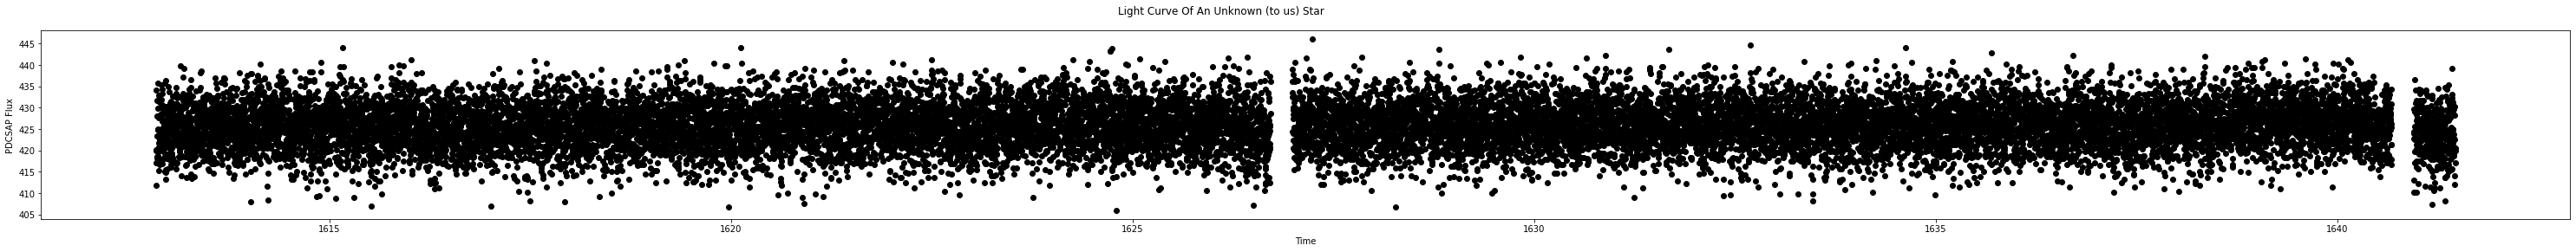

In [10]:
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Let's label the axes and define a title for the figure.
fig.suptitle("Light Curve Of An Unknown (to us) Star")
ax.set_ylabel("PDCSAP Flux")
ax.set_xlabel("Time")
o_width = fig.get_figwidth()
fig.set_figwidth(o_width * 9)

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

Vincent, Is it awesome!
Call it a day or do more?

In [ ]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data
    
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("Aperture")
plt.show()

WOW !!! Let's get mom. Ask her to cook a nice dinner to celebrate our SUCCESS (so far :-)